In [1]:
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import sys
import plotly.graph_objects as go
#print(os.path.abspath(os.getcwd()))
sys.path.append('/cs_storage/lirannoc/research/2')  
import da_transformations as da
import da_forecasting
from da_datasets import UnivariateDataset, get_dataset

pd.set_option('display.max_columns', 100)


/home/lirannoc/.conda/envs/da/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
cwd = os.getcwd()
onlyfiles = [os.path.join(cwd, f) for f in os.listdir(cwd) if os.path.isfile(os.path.join(cwd, f))]
#onlyfiles

In [26]:
res = []
for file  in onlyfiles:
    if file.split("3")[-1]==".xlsx":
        df = pd.read_excel(file)
        res.append(df)

In [27]:
df = pd.concat(res)

In [28]:
def get_transform(x):
   # print(x)
    for trans1 in list(da.ranges.keys()):
        temp_prob = str([(np.array(list(da.ranges.keys()))==trans1).astype(int)])
        if temp_prob==x:
            output = trans1
        elif "[]"==x:
            output = "Baseline"
        else: 
    
            for trans2 in list(da.ranges.keys()):
                temp_prob = str([(np.array(list(da.ranges.keys()))==trans1).astype(int),
                                (np.array(list(da.ranges.keys()))==trans2).astype(int)])
                if temp_prob==x:
                    output = trans1 + " + " + trans2    
    return output


In [29]:
df['Transformation'] = df['op prob'].map(lambda x: get_transform(x))
df = df.drop(["seed","Unnamed: 0"], axis=1)

### Mean results per model - Baseline

In [34]:
mean_df = df[df['Transformation']=='Baseline'].groupby('Model').mean().round(2)
mean_df.iloc[:,:3].sort_values('avg MAPE')

avg MAPE  avg RMSE  avg sMAPE
Model                                     
TCN              5.34     29.28       5.19
RNN              5.52     28.07       5.32
N-BEATS-I        7.86     38.08       7.46
N-BEATS-G        8.59     40.72       8.17
TRANSFORMER     10.34     47.82       9.75

### Mean results per transformation  - trending w.r.t. MAPE

In [31]:
mean_df = df.groupby('Transformation').mean().round(2)
mean_df.iloc[:,:3].sort_values('avg MAPE')

avg MAPE  avg RMSE  avg sMAPE
Transformation                                      
Flip                       4.30     23.60       4.20
Reverse + Trend Scale      4.53     24.21       4.42
Reverse                    4.71     25.32       4.57
Flip + Trend Scale         4.94     26.14       4.82
Scale                      5.40     29.67       5.21
Trend Scale                5.48     28.73       5.27
Flip + Reverse             5.67     29.34       5.45
Permutation                6.32     32.50       6.09
Smooth LS                  7.49     37.00       7.15
Baseline                   7.53     36.80       7.18
Smooth ETS                 7.54     37.16       7.20
MBB                        7.86     38.57       7.49
Window Warping             7.95     39.79       7.58
Identity                   8.10     40.29       7.71
Noise Scale                8.16     40.77       7.74
Jittering                  8.18     40.22       7.78
Gaussian TW                9.20     44.71       8.69
DTS                        9.27     45.15       8.75

### Mean results per model & transformation  - trending w.r.t. MAPE

In [33]:
mean_df = df.sort_values(['avg MAPE']).groupby(['Model','Transformation']).mean().round(2)
pd.set_option('display.max_rows', 100)
mean_df.iloc[:,:3].sort_values(['Model','avg MAPE'])

avg MAPE  avg RMSE  avg sMAPE
Model       Transformation                                      
N-BEATS-G   Flip                       4.80     26.72       4.64
            Reverse + Trend Scale      5.72     29.76       5.50
            Reverse                    5.98     31.34       5.75
            Flip + Reverse             6.27     32.38       6.00
            Trend Scale                6.63     33.28       6.33
            Scale                      6.72     34.75       6.43
            Flip + Trend Scale         6.79     34.90       6.48
            Smooth LS                  8.11     38.93       7.71
            Smooth ETS                 8.23     39.34       7.82
            Baseline                   8.59     40.72       8.17
            Jittering                  8.86     42.97       8.39
            Identity                   9.01     43.33       8.52
            Window Warping             9.30     45.49       8.79
            Permutation                9.32     45.42       8.86
            Noise Scale                9.40     46.19       8.88
            MBB                        9.81     46.40       9.26
            DTS                       10.19     49.82       9.56
            Gaussian TW               10.23     49.04       9.62
N-BEATS-I   Scale                      4.80     29.28       4.68
            Flip                       4.81     26.59       4.66
            Flip + Trend Scale         5.15     28.50       4.98
            Reverse                    5.19     27.57       5.03
            Reverse + Trend Scale      5.41     28.26       5.23
            Trend Scale                5.61     30.00       5.41
            Flip + Reverse             6.60     34.71       6.31
            Permutation                6.86     35.95       6.56
            Smooth LS                  6.96     35.97       6.64
            Jittering                  7.46     38.45       7.10
            Smooth ETS                 7.46     37.68       7.12
            Window Warping             7.60     39.00       7.24
            MBB                        7.71     39.55       7.35
            Baseline                   7.86     38.08       7.46
            Identity                   8.05     41.68       7.64
            Gaussian TW                8.26     43.19       7.82
            DTS                        9.00     45.11       8.49
            Noise Scale                9.09     47.69       8.57
RNN         Flip                       3.42     18.98       3.40
            Flip + Trend Scale         3.66     19.94       3.64
            Reverse + Trend Scale      3.76     20.67       3.70
            Flip + Reverse             4.20     22.39       4.07
            Reverse                    4.36     23.41       4.22
            Scale                      4.56     25.83       4.42
            Permutation                5.08     25.49       4.90
            Trend Scale                5.10     27.32       4.91
            Baseline                   5.52     28.07       5.32
            Smooth ETS                 6.86     33.80       6.57
            Smooth LS                  6.95     34.24       6.66
            MBB                        7.74     37.13       7.39
            Window Warping             8.11     38.94       7.72
            Identity                   8.24     39.26       7.85
            Noise Scale                8.47     40.75       8.05
            Jittering                  8.67     40.81       8.24
            Gaussian TW                9.86     44.99       9.29
            DTS                       10.17     47.25       9.58
TCN         Flip                       3.47     19.81       3.44
            Reverse                    3.59     20.02       3.54
            Flip + Trend Scale         4.07     21.43       4.13
            Reverse + Trend Scale      4.12     22.49       4.06
            Permutation                4.51     24.52       4.44
            Flip + Reverse             4.84     25.73       4.67
     

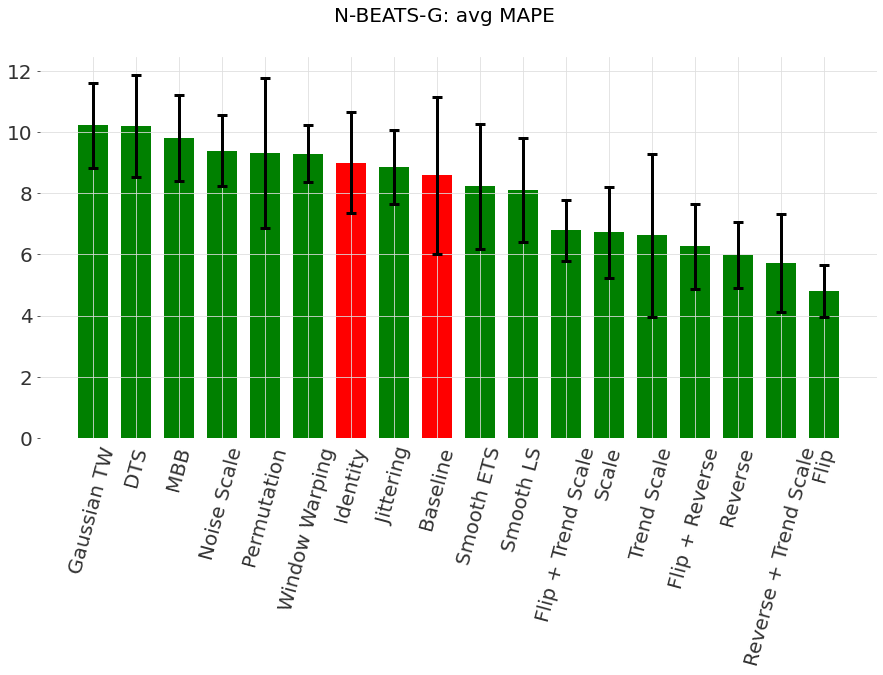

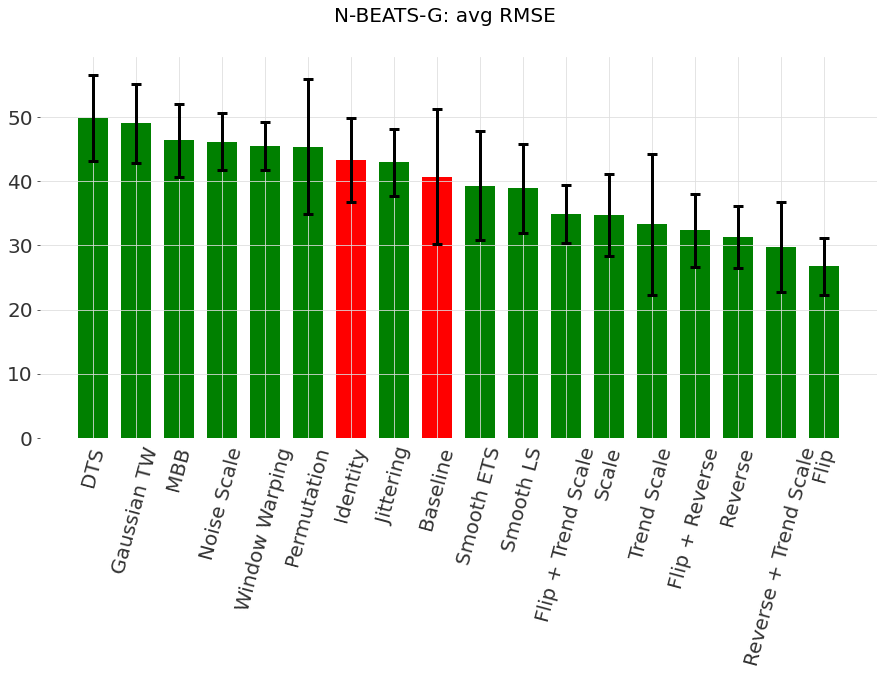

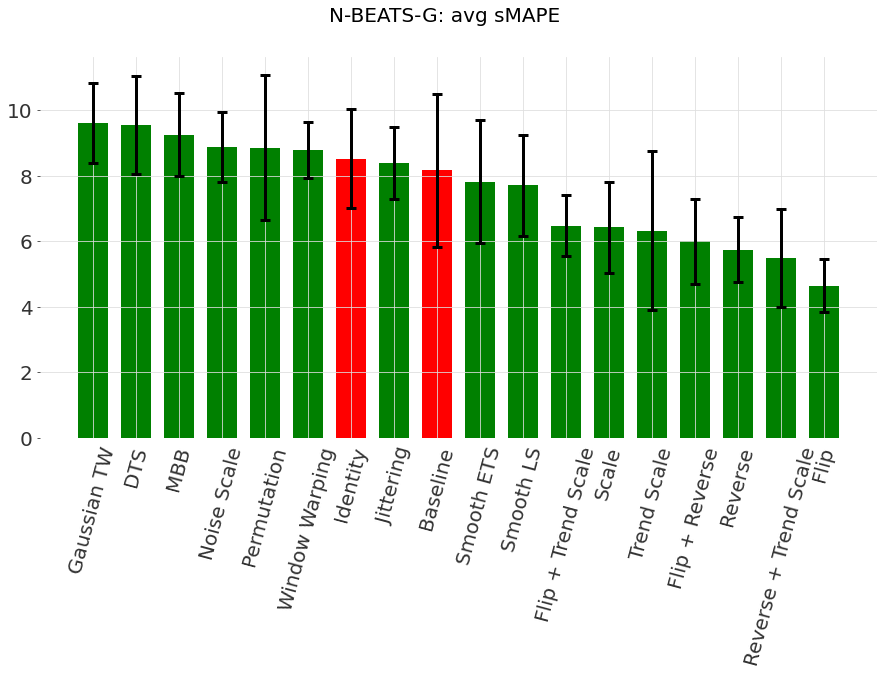

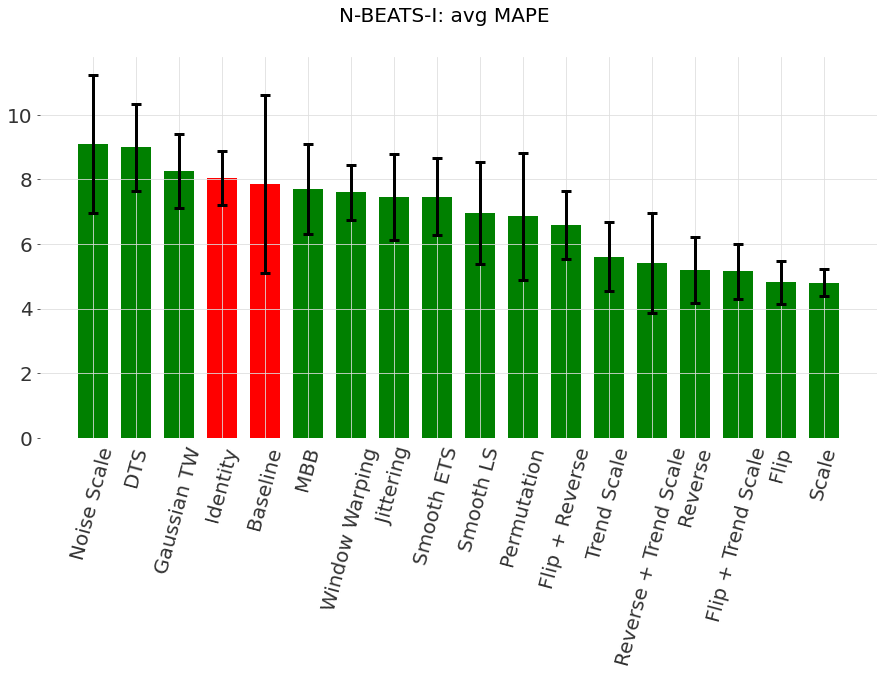

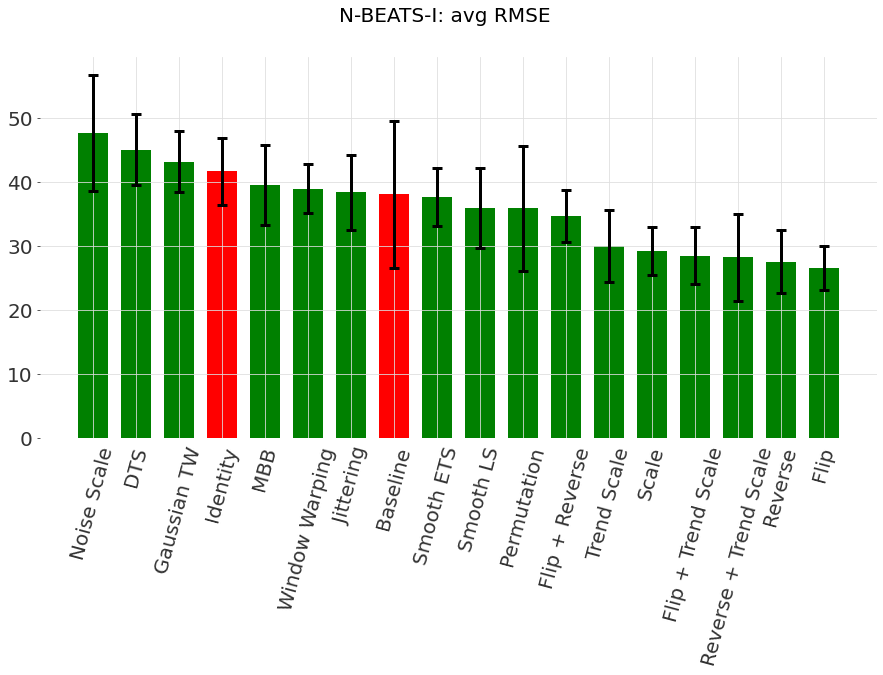

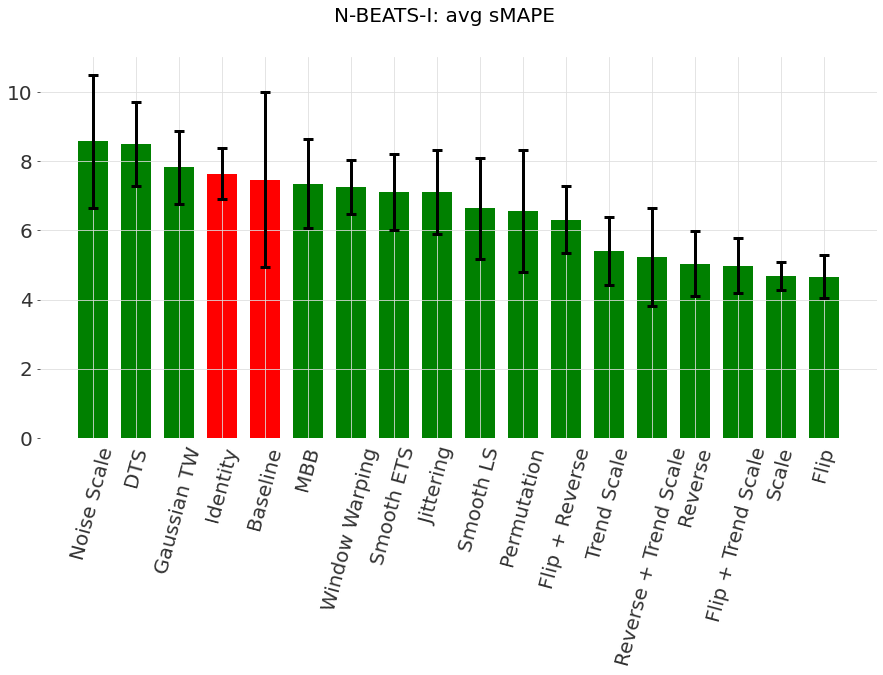

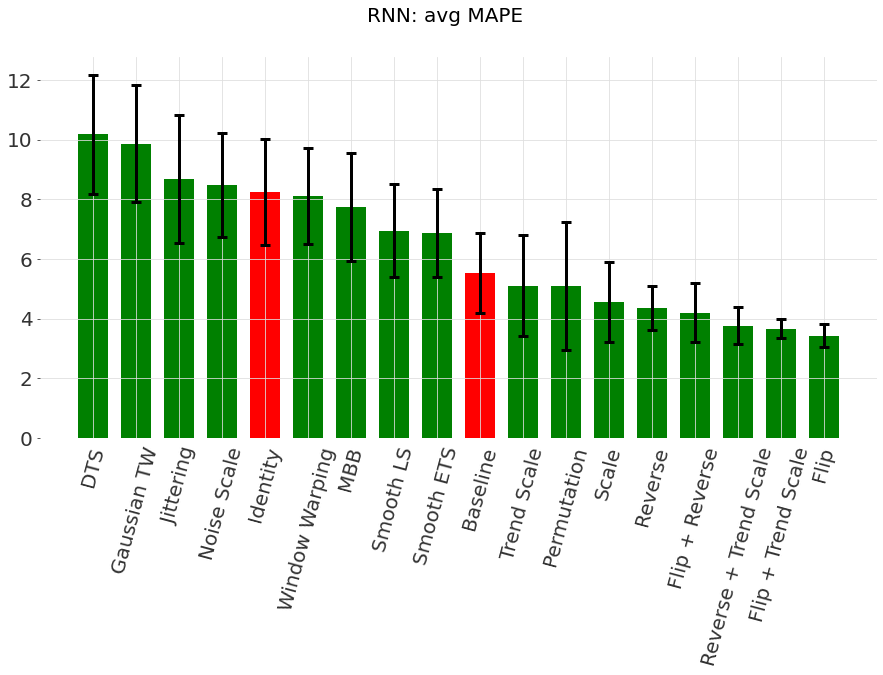

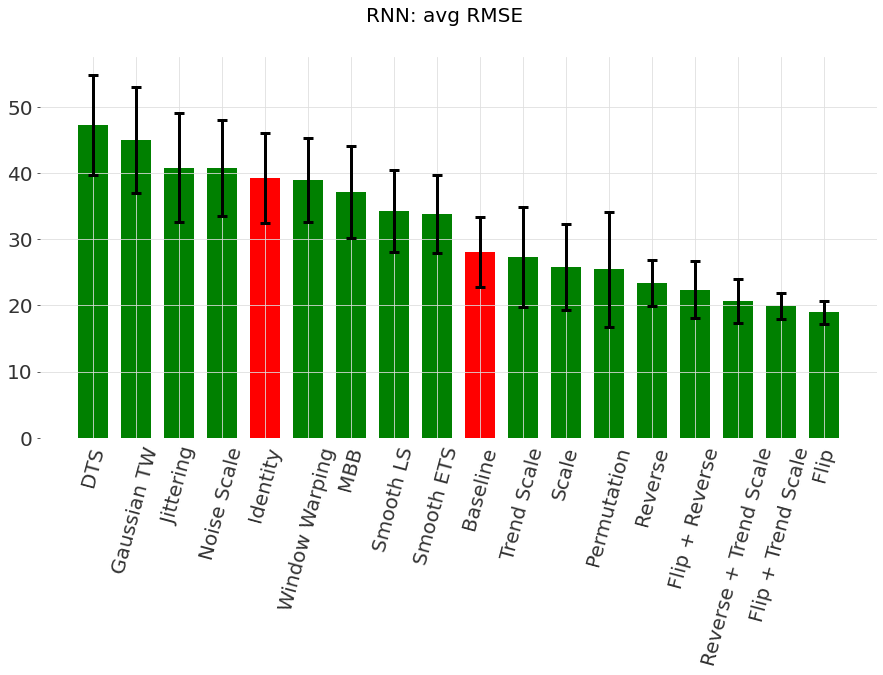

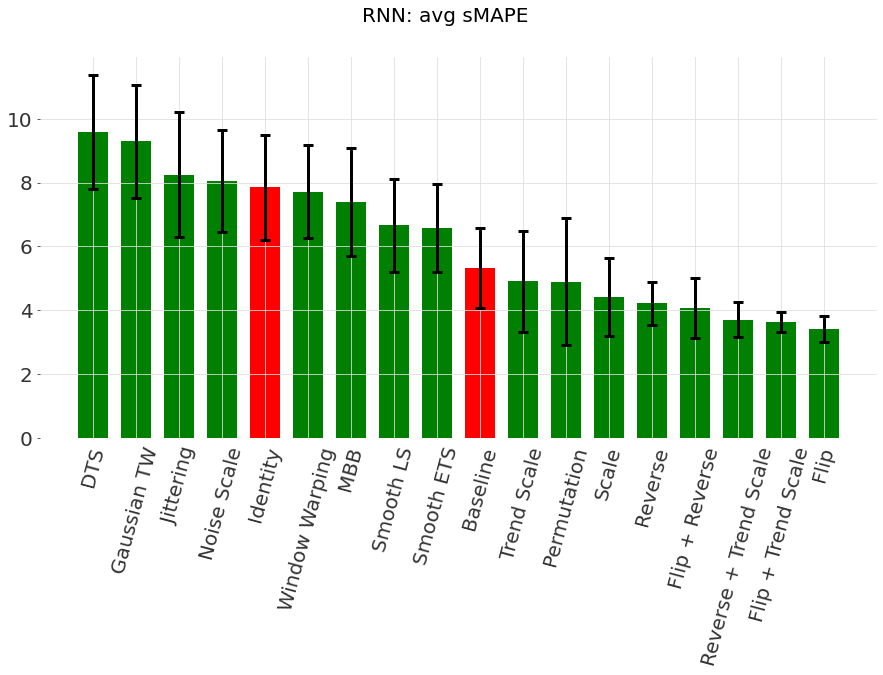

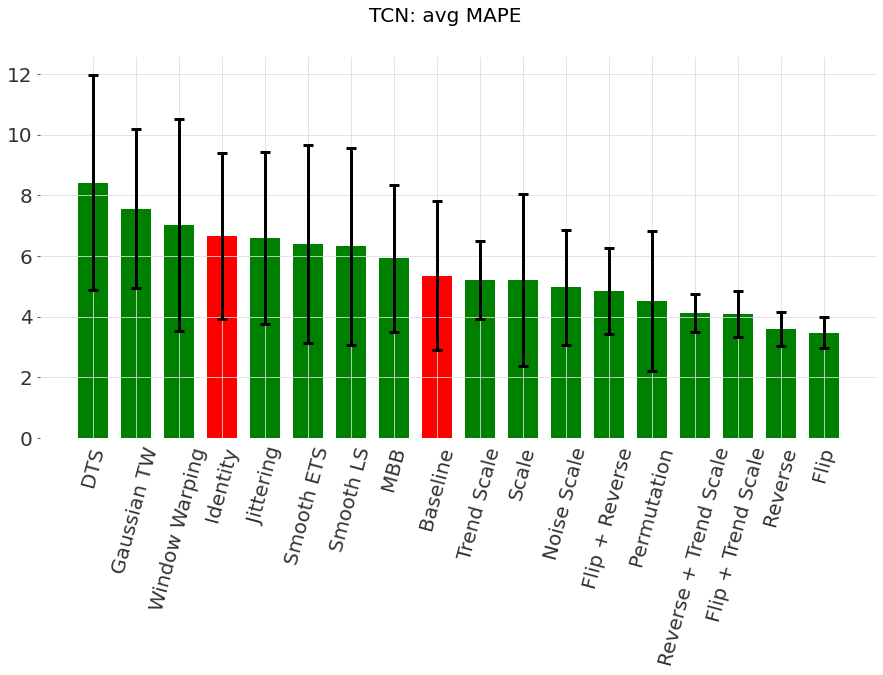

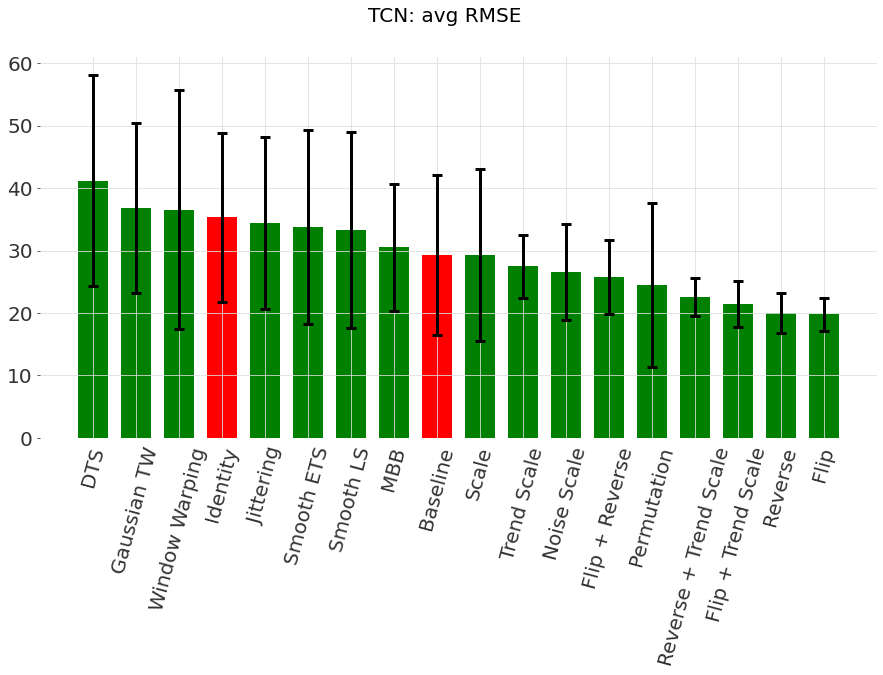

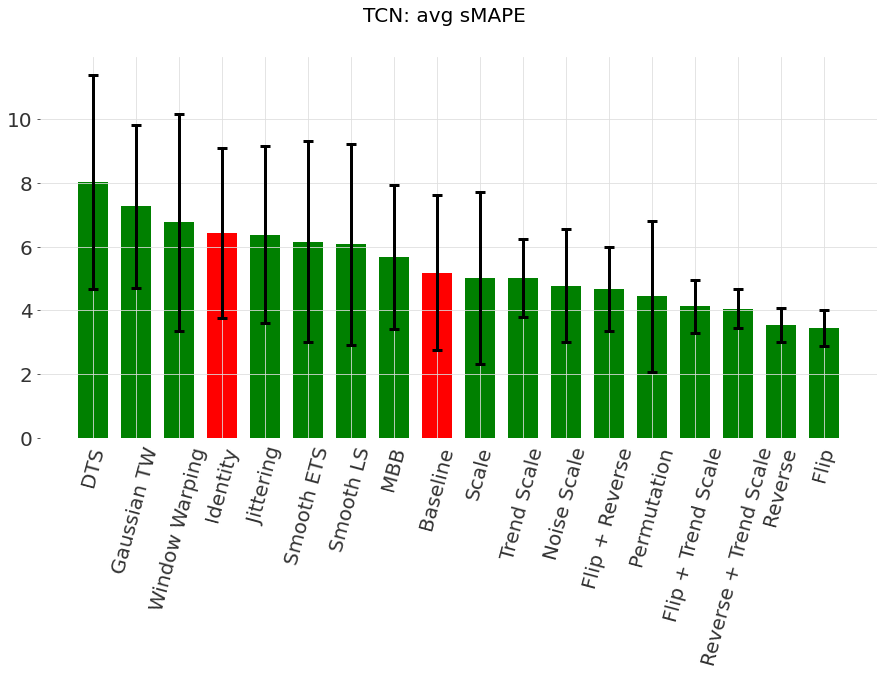

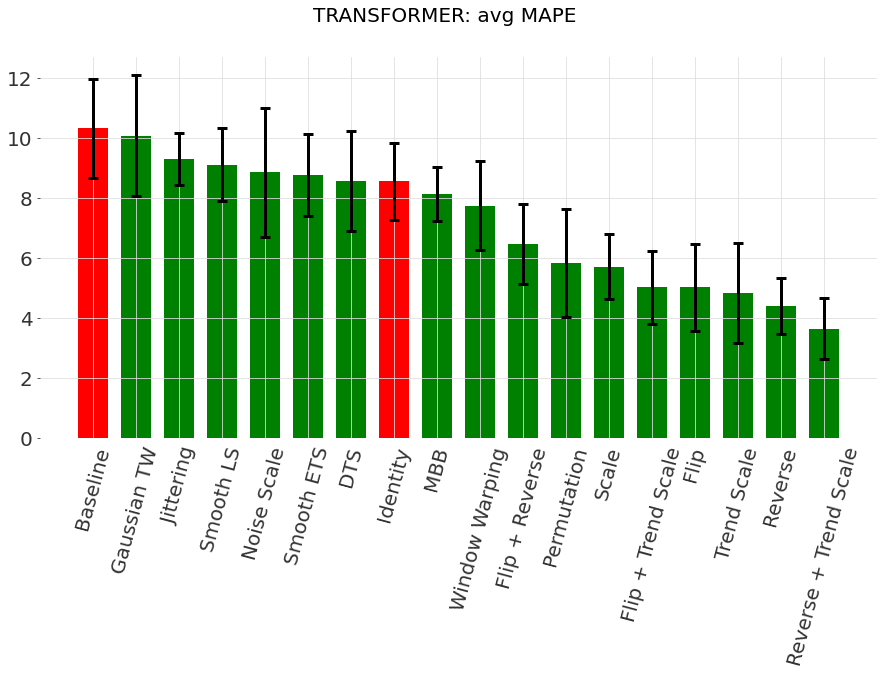

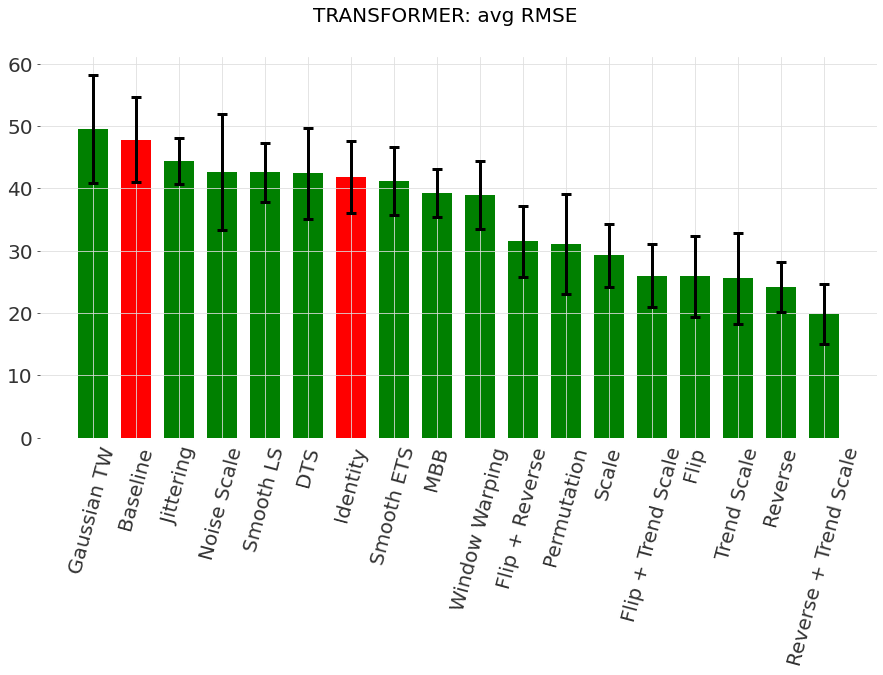

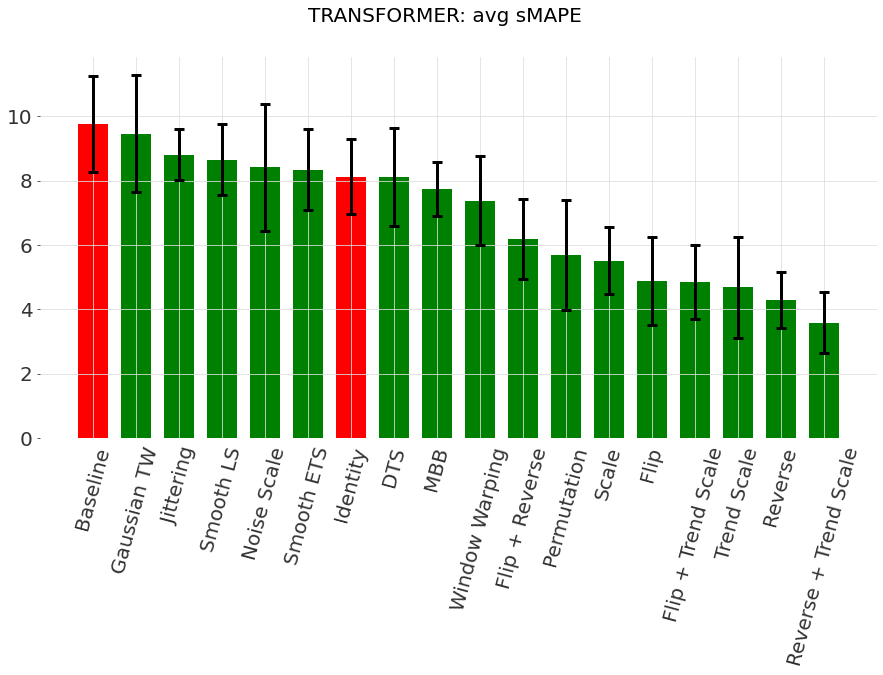

In [8]:
import matplotlib.pyplot as plt

models = np.unique(df['Model'])
for model in models:
    
    width = 0.7
    for metric in ['avg MAPE','avg RMSE','avg sMAPE']:
        fig = plt.subplots(figsize =(15, 7))

        
         
        mean_groupby = df[df['Model']==model].groupby('Transformation').mean()[metric].round(2)
        std_groupby = df[df['Model']==model].groupby('Transformation').std()[metric].round(2)
        trans_index = df[df['Model']==model].groupby('Transformation').std()[metric].index
        
    
        #color = "green"
        inds =np.flip(mean_groupby.argsort())
        std_groupby = std_groupby[inds]
        trans_index = trans_index[inds]
        mean_groupby = mean_groupby[inds]
        color = clrs = ['red' if (x in ['Identity','Baseline']) else 'green' for x in trans_index ]
        
        p1 = plt.bar(trans_index, mean_groupby, width,yerr =std_groupby,color = color,error_kw=dict(lw=3, capsize=5, capthick=3) )
        plt.xticks(rotation=75,fontsize=20)
        plt.yticks(fontsize=20)
        fig[0].suptitle(model + ": " + metric, size = 20)
        plt.show()
        # mape

        


In [10]:
models = np.unique(df['Model'])
for model in models:
    fig = go.Figure()
    
    for metric in ['avg MAPE','avg RMSE','avg sMAPE']:


  
        mean_groupby = df[df['Model']==model].groupby('Transformation').mean()[metric].round(2)
        std_groupby = df[df['Model']==model].groupby('Transformation').std()[metric].round(2)
        trans_index = df[df['Model']==model].groupby('Transformation').std()[metric].index
        
        
        fig = go.Figure()
        # mape
        fig.add_trace(go.Bar(
            name='Control',
            x=trans_index, y=mean_groupby,
            error_y=dict(type='data', array=std_groupby)
        ))
        
        fig.update_layout(barmode='group')
        fig.update_layout(title={'text':model + ": " + metric})
        fig.update_layout(xaxis={'categoryorder':'total descending'})
        fig.show()